## Exercice 8.1

Adaptez l'énoncé de l'exercice 8 aux données reprises dans le fichier SOCR_Data_Dinov_020108_HeightsWeigths.txt présent sur Moodle.

    - Représenter le nuage de points correspondant
    - Construire les droites des moindres carrés qui ajuste ces données, en utilisant respectivement le poids et la taille comme variable indépendante (variable explicative)
    - Donner leurs équations
    - Estimer la taille d’un étudiant dont le poids serait de 63 kilogrammes
    - Estimer le poids d’un étudiant dont la taille serait de 178 centimètres

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
input_df = pd.read_csv('SOCR_Data_Dinov_020108_HeightsWeights.txt', sep='\t', skiprows=5)

In [4]:
input_df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [7]:
input_df['Taille (centimetre)'] = input_df['Height(Inches)']*2.54 
input_df['Poids (kilogramme)'] = input_df['Weight(Pounds)']*0.45359237

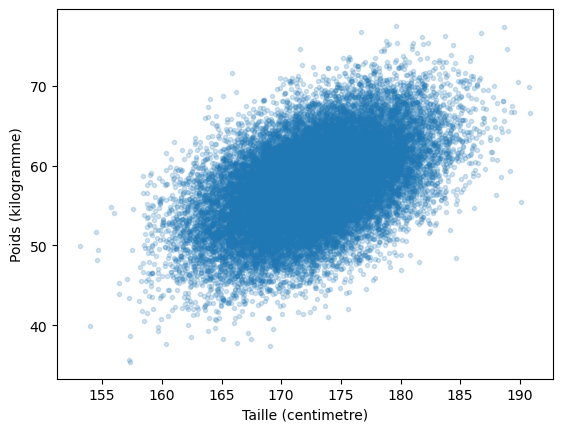

In [11]:
plt.plot(input_df['Taille (centimetre)'],input_df['Poids (kilogramme)'], '.', alpha=0.2)
plt.xlabel('Taille (centimetre)')
plt.ylabel('Poids (kilogramme)')
plt.show()

In [12]:
input_df = input_df.rename(columns={'Taille (centimetre)':'Taille','Poids (kilogramme)':'Poids'})

In [13]:
input_df

,Index,Height(Inches),Weight(Pounds),Taille,Poids
0,1,65.78331,112.9925,167.089607,51.252536
1,2,71.51521,136.4873,181.648633,61.909598
2,3,69.39874,153.0269,176.272800,69.411834
3,4,68.21660,142.3354,173.270164,64.562251
4,5,67.78781,144.2971,172.181037,65.452064
...,...,...,...,...,...
24995,24996,69.50215,118.0312,176.535461,53.538052
24996,24997,64.54826,120.1932,163.952580,54.518718
24997,24998,64.69855,118.2655,164.334317,53.644328
24998,24999,67.52918,132.2682,171.524117,59.995846


In [16]:
input_df[['Poids','Taille']].cov()

,Poids,Taille
Poids,27.976633,12.847375
Taille,12.847375,23.331451


In [17]:
a = input_df.cov()['Poids']['Taille']/input_df.cov()['Taille']['Taille']

In [18]:
b = input_df['Poids'].mean() - a * input_df['Taille'].mean()

In [19]:
a, b

(0.550646216027365, -37.45572700115705)

In [20]:
input_df['Modele Poids vs Taille'] = a * input_df['Taille'] + b

In [21]:
input_df

,Index,Height(Inches),Weight(Pounds),Taille,Poids,Modele Poids vs Taille
0,1,65.78331,112.9925,167.089607,51.252536,54.551533
1,2,71.51521,136.4873,181.648633,61.909598,62.568406
2,3,69.39874,153.0269,176.272800,69.411834,59.608223
3,4,68.21660,142.3354,173.270164,64.562251,57.954833
4,5,67.78781,144.2971,172.181037,65.452064,57.355110
...,...,...,...,...,...,...
24995,24996,69.50215,118.0312,176.535461,53.538052,59.752857
24996,24997,64.54826,120.1932,163.952580,54.518718,52.824141
24997,24998,64.69855,118.2655,164.334317,53.644328,53.034343
24998,24999,67.52918,132.2682,171.524117,59.995846,56.993379


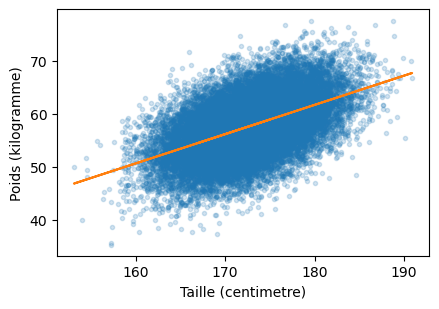

In [30]:
fac = 0.8
plt.rcParams["figure.figsize"] = (fac*6,fac*4)
plt.plot(input_df['Taille'], input_df['Poids'], '.', alpha=0.2)
plt.plot(input_df['Taille'],input_df['Modele Poids vs Taille'],'-')
plt.xlabel('Taille (centimetre)')
plt.ylabel('Poids (kilogramme)')
plt.show()

Ceci correspond donc à l'explication du poids par la taille.

Poids estimé d'un étudiant de 1m78:

In [31]:
a*178+b

60.55929945171392

Même exercice mais dans l'autre sens, soit estimer la taille à partir du poids...

In [32]:
aa = input_df.cov()['Poids']['Taille']/input_df.cov()['Poids']['Poids']

In [33]:
bb = input_df['Taille'].mean() - aa * input_df['Poids'].mean()

In [34]:
aa,bb

(0.4592180684854001, 146.23214315389802)

In [35]:
input_df['Modele Taille vs Poids'] = aa * input_df['Poids'] + bb

In [36]:
input_df

,Index,Height(Inches),Weight(Pounds),Taille,Poids,Modele Poids vs Taille,Modele Taille vs Poids
0,1,65.78331,112.9925,167.089607,51.252536,54.551533,169.768234
1,2,71.51521,136.4873,181.648633,61.909598,62.568406,174.662149
2,3,69.39874,153.0269,176.272800,69.411834,59.608223,178.107312
3,4,68.21660,142.3354,173.270164,64.562251,57.954833,175.880296
4,5,67.78781,144.2971,172.181037,65.452064,57.355110,176.288913
...,...,...,...,...,...,...,...
24995,24996,69.50215,118.0312,176.535461,53.538052,59.752857,170.817784
24996,24997,64.54826,120.1932,163.952580,54.518718,52.824141,171.268124
24997,24998,64.69855,118.2655,164.334317,53.644328,53.034343,170.866588
24998,24999,67.52918,132.2682,171.524117,59.995846,56.993379,173.783320


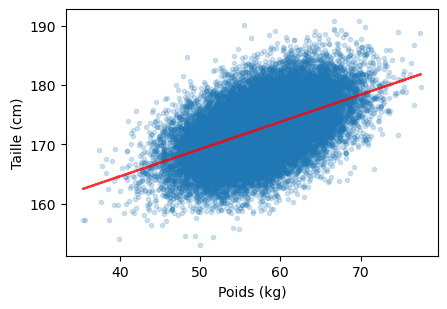

In [40]:
fac = 0.8
plt.rcParams["figure.figsize"] = (fac*6,fac*4)
plt.plot(input_df['Poids'],input_df['Taille'], '.', alpha=0.2)
plt.plot(input_df['Poids'],input_df['Modele Taille vs Poids'], '-', alpha=0.8, color='red')
plt.xlabel('Poids (kg)')
plt.ylabel('Taille (cm)')
plt.show()

Taille estimée d'une personne pesant 63 kg:

In [41]:
aa*63+bb

175.16288146847822

Représentons les deux analyses (explication du poids en fonction de la taille ou l'inverse) dans un même graphe 
et reprenons les deux estimations demandées: poids d'une personne de 1m78 pour le premier modèle et taille d'une personne 
de 63 kg pour le deuxième modèle.

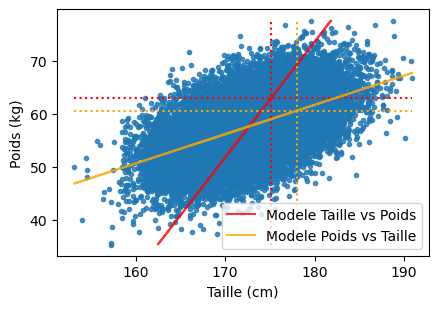

In [44]:
plt.plot(input_df['Taille'],input_df['Poids'],'.',alpha=0.8)

plt.plot(input_df['Modele Taille vs Poids'], input_df['Poids'], '-', alpha=0.8, color='red', label='Modele Taille vs Poids')
plt.hlines(y=63, xmin=np.min(input_df['Taille']), xmax=np.max(input_df['Taille']), color='red', linestyles='dotted')
plt.vlines(x=aa*63+bb, ymin=np.min(input_df['Poids']), ymax=np.max(input_df['Poids']), color='red', linestyles='dotted')

plt.plot(input_df['Taille'], input_df['Modele Poids vs Taille'], '-', alpha=0.8, color='orange', label='Modele Poids vs Taille')
plt.vlines(x=178, ymin=np.min(input_df['Poids']), ymax=np.max(input_df['Poids']), color='orange', linestyles='dotted')
plt.hlines(y=a*178+b, xmin=np.min(input_df['Taille']), xmax=np.max(input_df['Taille']), color='orange', linestyles='dotted')

plt.ylabel('Poids (kg)')
plt.xlabel('Taille (cm)')
plt.legend()
plt.show()